# Creating a correlation table for economic features

In [1]:
# Import dependencies
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Read in dataframe with economic features without NA values
df = pd.read_csv('../Raw_Data/dataset_na_dropped.csv')
df.head()

,year,state,population_million,education_million,welfare_million,crime_rate,unemployment_rate,divorce_rate_per_1000_people,homeownership_rate,minimum_wage_effective,CPI_Average,inflation_rate,avg_wage_index,poverty_rate
0,1984,National,235.164,191925.0,143711.9,539.2,7.637412,4.9778,64.5,3.360196,103.9,4.3,16135.07,16.04
1,1985,National,237.369,209227.0,165441.6,556.6,7.304109,4.9222,63.9,3.360196,107.6,3.5,16822.51,15.72
2,1986,National,239.595,227705.0,159050.4,620.1,7.096872,4.8667,63.8,3.360196,109.6,1.9,17321.82,15.20
3,1987,National,241.842,242694.0,167313.2,609.7,6.297189,4.8111,64.0,3.360196,113.6,3.7,18426.51,14.48
4,1988,National,244.110,260024.0,176861.6,637.2,5.589161,4.7556,63.8,3.409804,118.3,4.1,19334.04,14.81


### Convert to per capita values,  drop columns

In [29]:
df['education_per_capita'] = df.education_million / df.population_million
df['welfare_per_capita'] = df.welfare_million / df.population_million

# columns to be dropped
columns_to_drop = ['year','population_million', 'education_million', 'welfare_million']


# reorganize columns by decreasing value of correlation to poverty_rate

column_order =['year', 'state','poverty_rate','unemployment_rate','divorce_rate_per_1000_people',
               'crime_rate','inflation_rate', 'welfare_per_capita', 'minimum_wage_effective', 'CPI_Average', 
               'avg_wage_index','education_per_capita','homeownership_rate',
               'population_million', 'education_million','welfare_million'      
       ]
df = df[column_order]

## Correlation matrix and heatmap for the entire dataset

In [38]:
# Creating correlation matrix and formatting to two decimals
correlationMatrix = df.drop(columns = columns_to_drop).corr()
# pd.options.display.float_format = '{:.2f}'.format
correlationMatrix = np.round(correlationMatrix, decimals = 2)
correlationMatrix

,poverty_rate,unemployment_rate,divorce_rate_per_1000_people,crime_rate,inflation_rate,welfare_per_capita,minimum_wage_effective,CPI_Average,avg_wage_index,education_per_capita,homeownership_rate
poverty_rate,1.00,0.45,0.45,0.39,0.25,-0.21,-0.38,-0.43,-0.43,-0.50,-0.38
unemployment_rate,0.45,1.00,-0.01,0.16,-0.17,0.30,0.17,0.06,0.05,0.05,-0.11
divorce_rate_per_1000_people,0.45,-0.01,1.00,0.22,0.55,-0.42,-0.92,-0.99,-0.99,-0.88,-0.23
crime_rate,0.39,0.16,0.22,1.00,0.12,-0.09,-0.23,-0.20,-0.22,-0.23,-0.29
inflation_rate,0.25,-0.17,0.55,0.12,1.00,-0.21,-0.58,-0.54,-0.53,-0.49,-0.11
welfare_per_capita,-0.21,0.30,-0.42,-0.09,-0.21,1.00,0.55,0.44,0.44,0.58,-0.25
minimum_wage_effective,-0.38,0.17,-0.92,-0.23,-0.58,0.55,1.00,0.94,0.94,0.87,0.10
CPI_Average,-0.43,0.06,-0.99,-0.20,-0.54,0.44,0.94,1.00,1.00,0.89,0.20
avg_wage_index,-0.43,0.05,-0.99,-0.22,-0.53,0.44,0.94,1.00,1.00,0.89,0.21
education_per_capita,-0.50,0.05,-0.88,-0.23,-0.49,0.58,0.87,0.89,0.89,1.00,0.17


HEATMAP


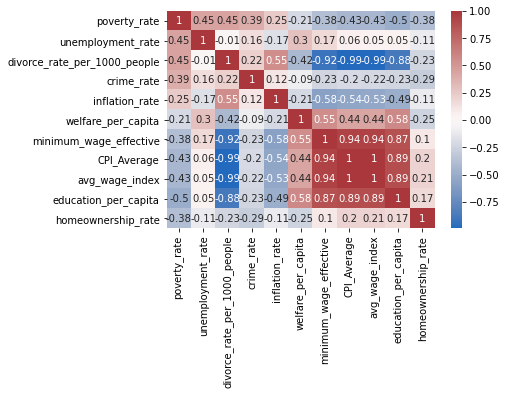

In [40]:
# Plotting heatmap of correlation matrix
print('HEATMAP')
ax = sn.heatmap(correlationMatrix, annot = True, cmap = 'vlag')
#ax.set_title = 'HEATMAP'
plt.show()

## Correlation matrix and heatmap for a few states

------National-------


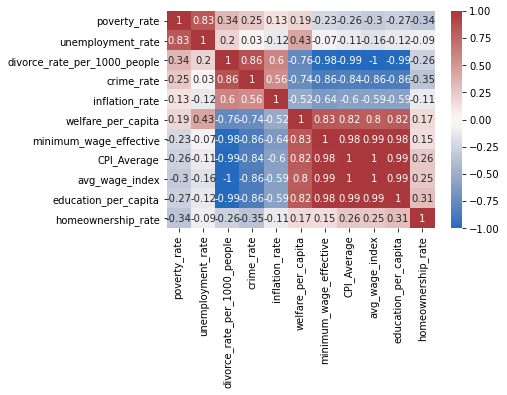

------California-------


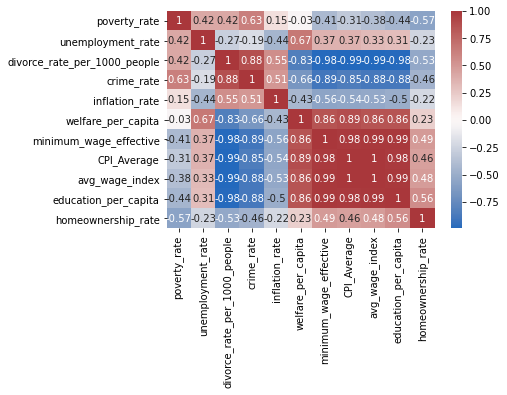

------Georgia-------


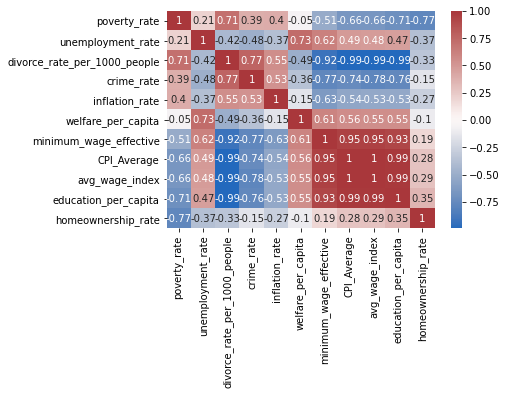

------Iowa-------


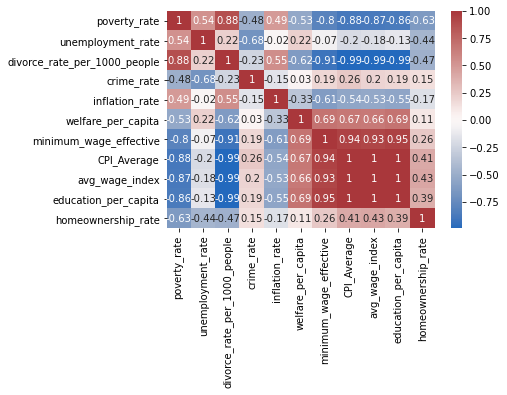

------Maryland-------


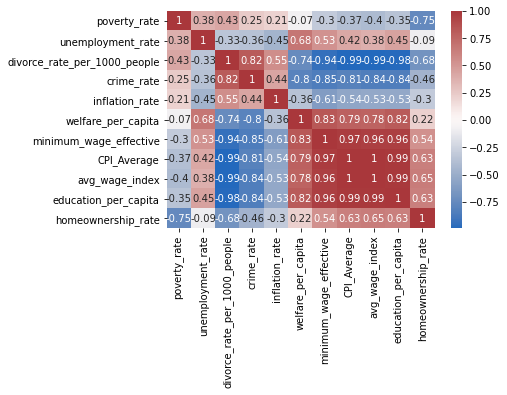

------Missouri-------


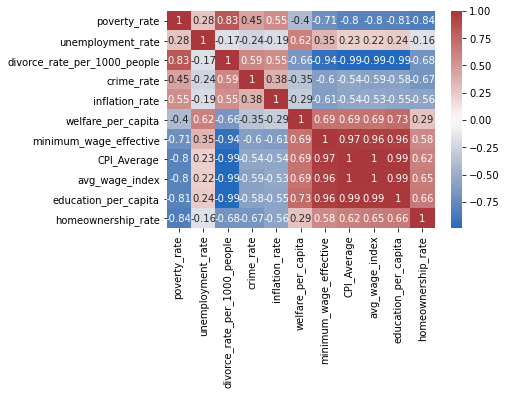

------New Jersey-------


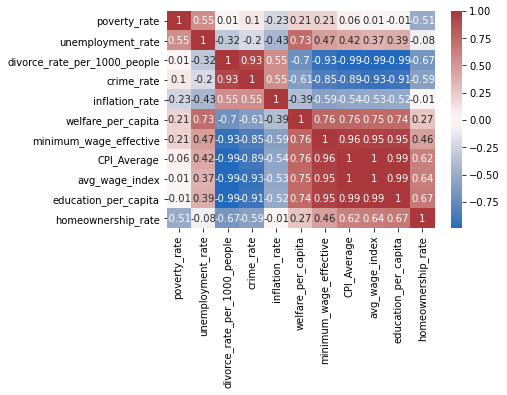

------Ohio-------


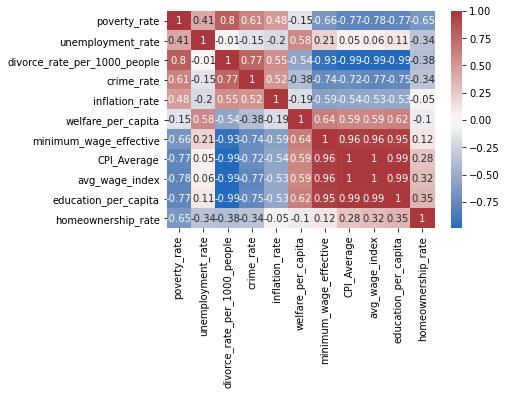

------South Carolina-------


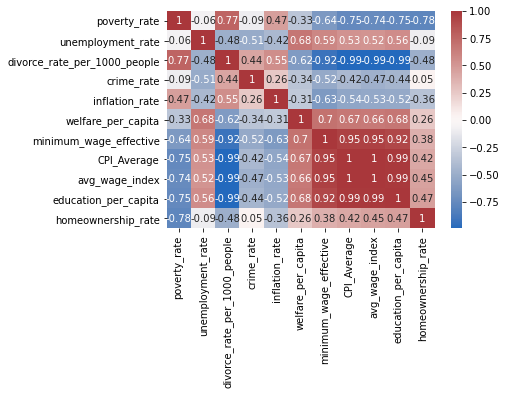

------Vermont-------


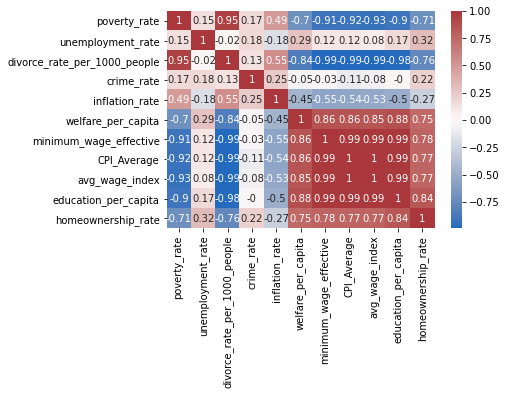

------Wyoming-------


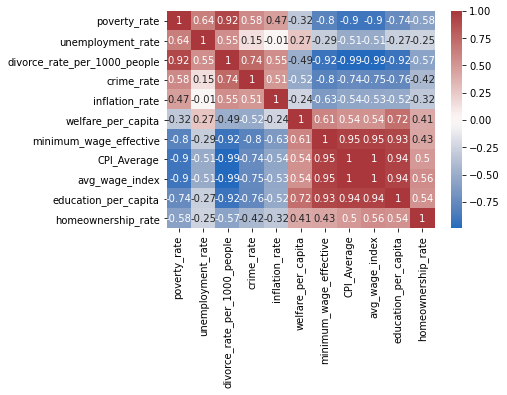

In [51]:
#  step: sampling rate from list of states
step = 5

state_list = df['state'].unique().tolist()
for index, state in enumerate(state_list):
    if index % step == 0 :
        print(f'------{state}-------')
        # Creating correlation matrix and formatting to two decimals
        cMatrix = df.loc[df['state']==state].drop(columns = columns_to_drop).corr()
        # pd.options.display.float_format = '{:.2f}'.format
        cMatrix = np.round(cMatrix, decimals = 2)
        sn.heatmap(cMatrix, annot = True, cmap = 'vlag')
        plt.show()

## Get 1 table with all the correlation values to 'poverty_rate'

In [61]:
corr_values_df = correlationMatrix[['poverty_rate']]
corr_values_df.columns = ['All_values']
state_list = df['state'].unique().tolist()
for state in state_list:
    # Creating correlation matrix and formatting to two decimals
    cMatrix2 = df.loc[df['state']==state].drop(columns = columns_to_drop).corr()
    # pd.options.display.float_format = '{:.2f}'.format
    cMatrix2 = np.round(cMatrix2, decimals = 2)
    corr_values_df[state] = cMatrix2['poverty_rate']

corr_values_df= corr_values_df.transpose()
corr_values_df

C:\Users\jvo1\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,poverty_rate,unemployment_rate,divorce_rate_per_1000_people,crime_rate,inflation_rate,welfare_per_capita,minimum_wage_effective,CPI_Average,avg_wage_index,education_per_capita,homeownership_rate
All_values,1.0,0.45,0.45,0.39,0.25,-0.21,-0.38,-0.43,-0.43,-0.50,-0.38
National,1.0,0.83,0.34,0.25,0.13,0.19,-0.23,-0.26,-0.30,-0.27,-0.34
Alabama,1.0,0.47,0.90,0.48,0.56,-0.52,-0.82,-0.89,-0.88,-0.84,-0.69
Alaska,1.0,0.78,0.69,-0.56,0.45,-0.41,-0.67,-0.69,-0.66,-0.41,-0.67
Arizona,1.0,0.63,-0.50,-0.46,-0.37,0.62,0.70,0.60,0.56,0.56,-0.18
Arkansas,1.0,0.66,0.88,-0.43,0.50,-0.35,-0.78,-0.87,-0.86,-0.81,-0.27
California,1.0,0.42,0.42,0.63,0.15,-0.03,-0.41,-0.31,-0.38,-0.44,-0.57
Colorado,1.0,0.42,0.67,0.62,0.55,-0.10,-0.58,-0.67,-0.64,-0.65,-0.65
Connecticut,1.0,0.29,-0.35,-0.33,-0.45,0.14,0.27,0.39,0.34,0.31,0.07
Delaware,1.0,0.24,0.59,-0.63,0.26,-0.40,-0.54,-0.54,-0.54,-0.48,-0.51


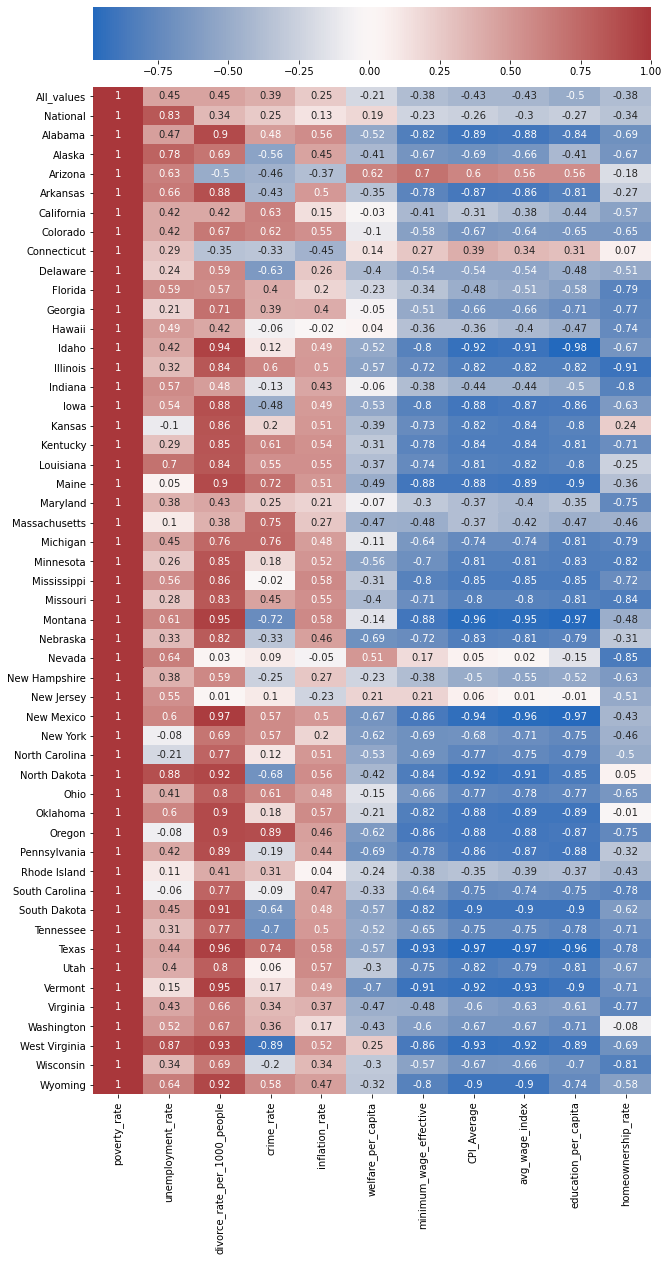

In [71]:
grid_kws = {"height_ratios": (.05, .95), "hspace": .05}

fig, (cbar_ax, ax) = plt.subplots(2, figsize=(10, 20), gridspec_kw=grid_kws)
ax= sn.heatmap(corr_values_df, ax=ax, cbar_ax= cbar_ax, cbar_kws={'orientation':'horizontal'},
               annot = True, cmap = 'vlag')
plt.show()
